# Assignment 3
Solve the 2D wave equation for eigenmodes and eigenfrequencies of membranes (square, rectangle, circle) with fixed boundaries. Discretize, compute eigenvalues, analyze frequency dependence on size, and visualize time evolution. Also, solve the steady-state diffusion equation on a circular domain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from IPython.display import HTML

from src.config import *

----
## 3.1 Eigenmodus of drums or membranes of different shapes
Lorem ipsum odor amet, consectetuer adipiscing elit. Varius nullam vulputate lobortis porttitor in odio mus dictum. Tellus phasellus congue hac, tempus montes ullamcorper himenaeos. Arcu bibendum convallis lacus taciti rutrum ac dictumst mollis. Cras nullam est nostra netus nascetur iaculis hendrerit. Odio parturient purus maecenas consectetur porta hendrerit lobortis sodales. Maecenas quisque gravida sed nisi odio pellentesque habitasse. Cras tempus lacinia rhoncus conubia duis massa. Sem nibh dui mus consequat facilisi. Porta malesuada porttitor neque turpis molestie?

Consequat dictum curabitur integer suspendisse inceptos. Habitant mattis odio lorem nostra feugiat vitae vel habitasse. Scelerisque vehicula turpis eleifend, felis aptent venenatis ante fames. Tincidunt auctor quam ipsum velit ornare augue. Etiam habitant felis diam; ullamcorper netus aenean consectetur leo. Purus phasellus potenti tortor maecenas pulvinar. Auctor cras cursus hac tempor nam leo ad.

_by: Tycho Stam_

In [2]:
from src.grid_discretization import (
    initialize_grid_vector,
    initialize_tridiagonal_matrix,
)
from src.eigen_solver import (
    solve_eigenvalues,
)
from src.get_frequency import get_frequencies_list
from script.create_plot import (
    create_seaborn_heatmap,
    plot_eigenfrequency,
    plot_eigenmode_animation,
    plot_multiple_eigenmodes,
)

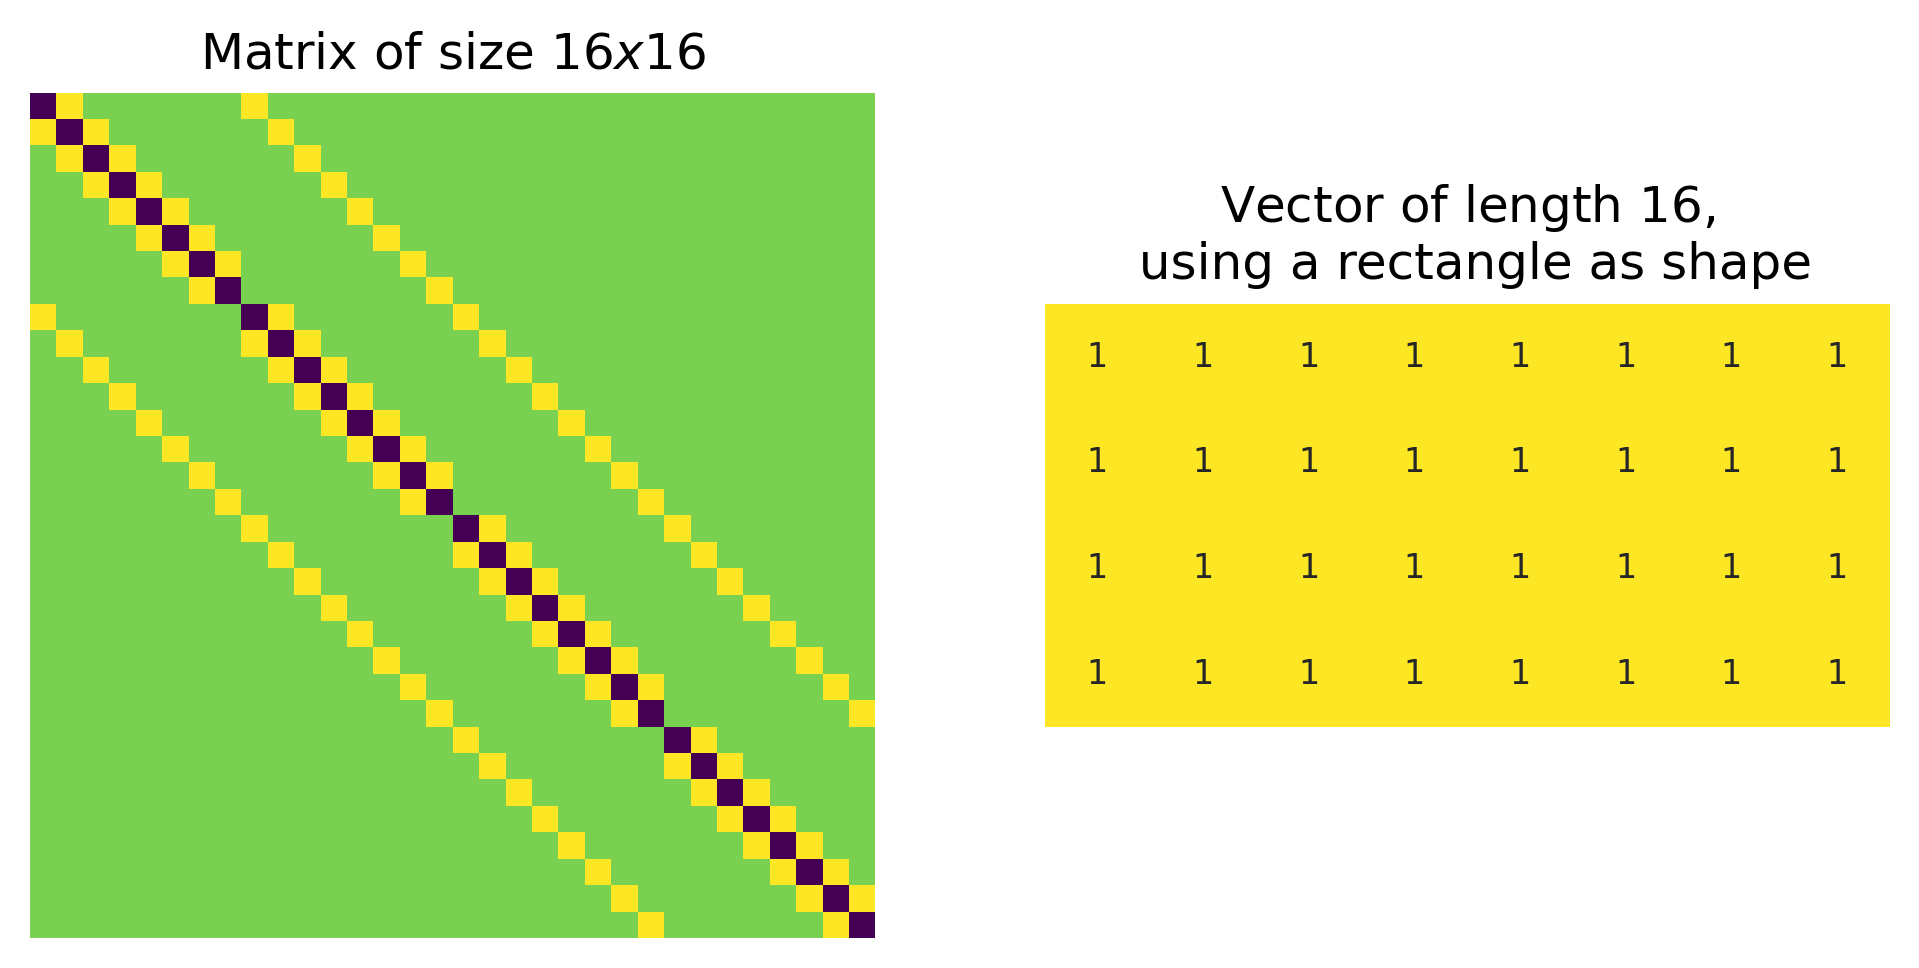

In [3]:
L = 4
shape = "rectangle"

v = initialize_grid_vector(L, shape=shape)
M = initialize_tridiagonal_matrix(v, L)

_, ax = plt.subplots(1, 2, figsize=(FIG_SIZE), dpi=FIG_DPI)

create_seaborn_heatmap(M.toarray(), ax[0])
ax[0].set_title(f"Matrix of size ${L**2} x {L**2}$")

create_seaborn_heatmap(
    v.reshape(L, L if not shape == "rectangle" else L * 2),
    ax[1],
    True,
    True,
)
ax[1].set_title(f"Vector of length ${L**2}$,\n using a {shape} as shape")

plt.show()

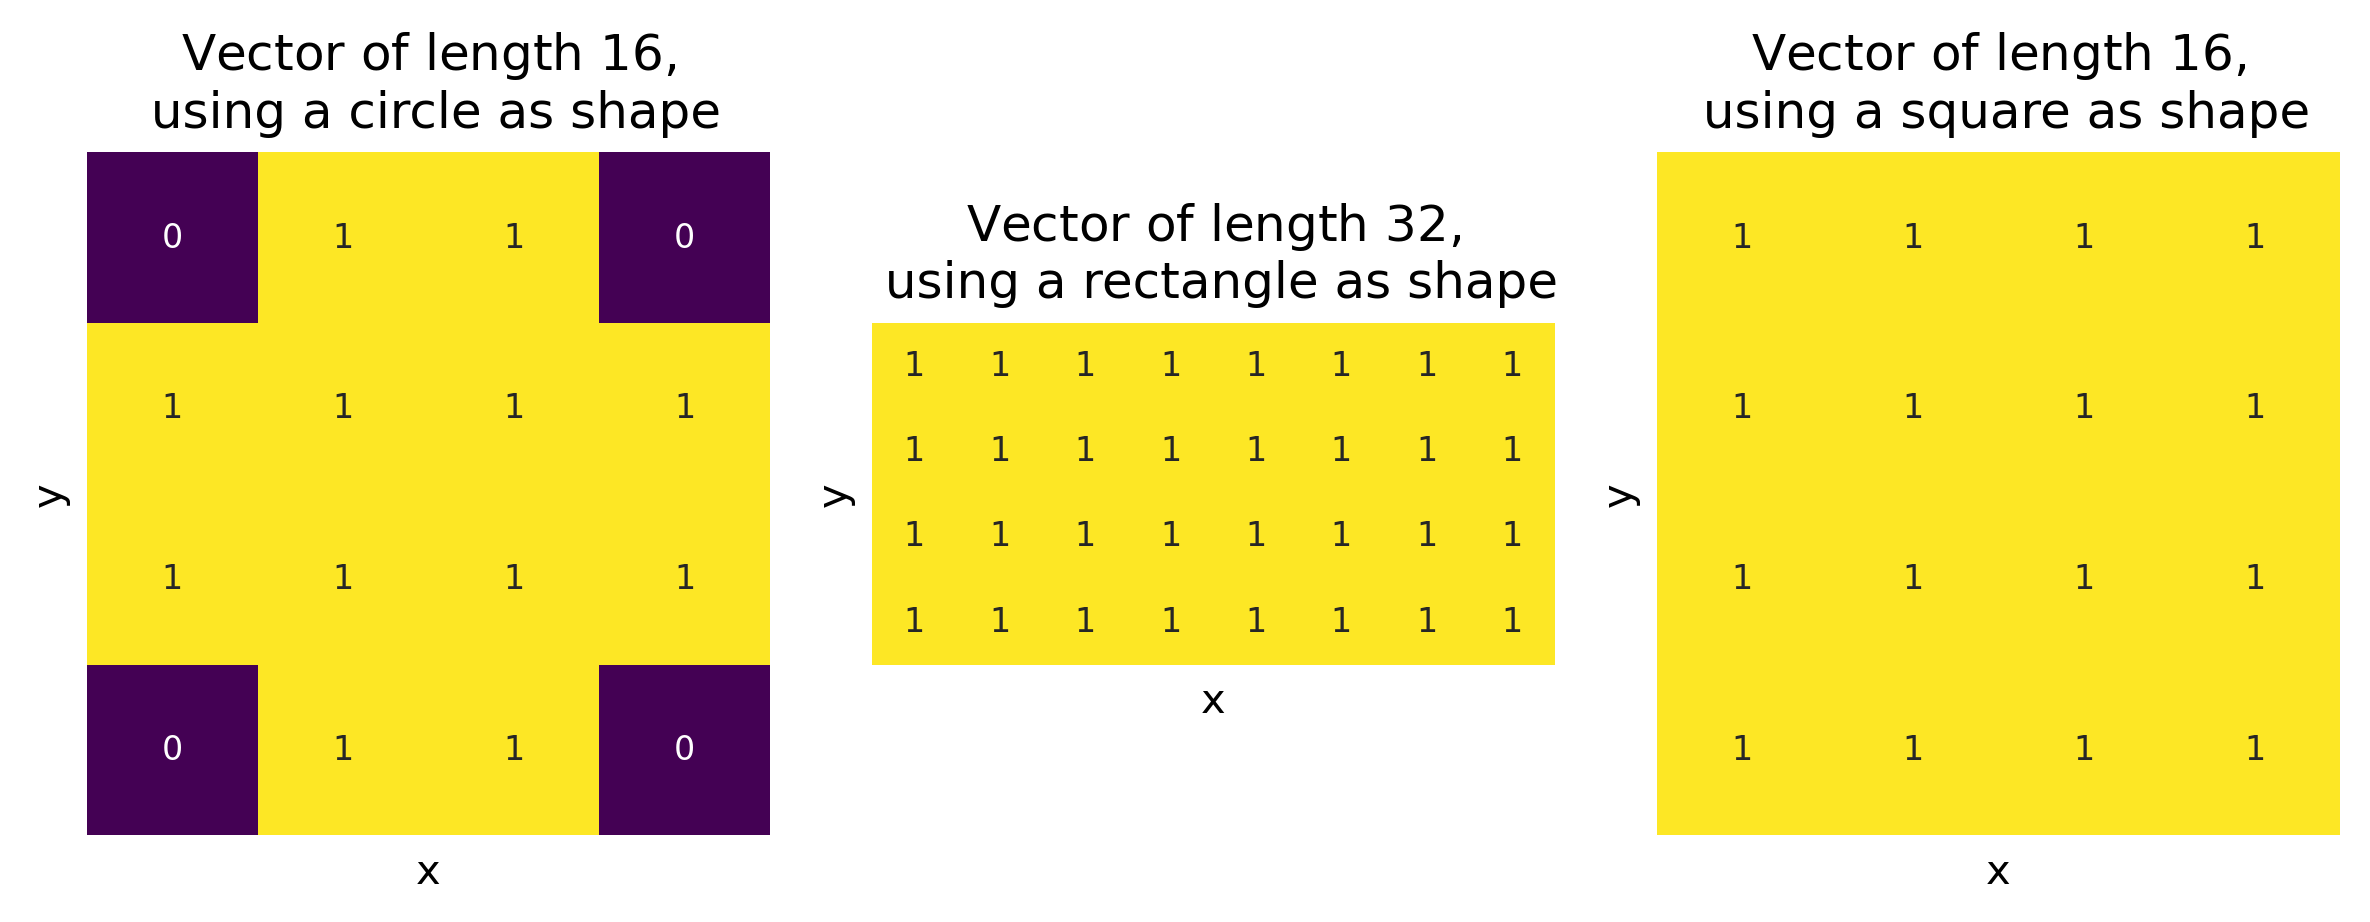

In [4]:
shapes = ["circle", "rectangle", "square"]
_, ax = plt.subplots(1, len(shapes), figsize=(FIG_SIZE), dpi=FIG_DPI)

for i, shape in enumerate(shapes):
    v = initialize_grid_vector(L, shape=shape)

    create_seaborn_heatmap(
        v.reshape(L, L if not shape == "rectangle" else L * 2), ax[i], True, True
    )
    ax[i].set_title(f"Vector of length ${v.shape[0]}$,\n using a {shape} as shape")
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")

plt.tight_layout()
plt.savefig(f"{FIG_DIR}vector_shapes.png")
plt.show()
plt.close()

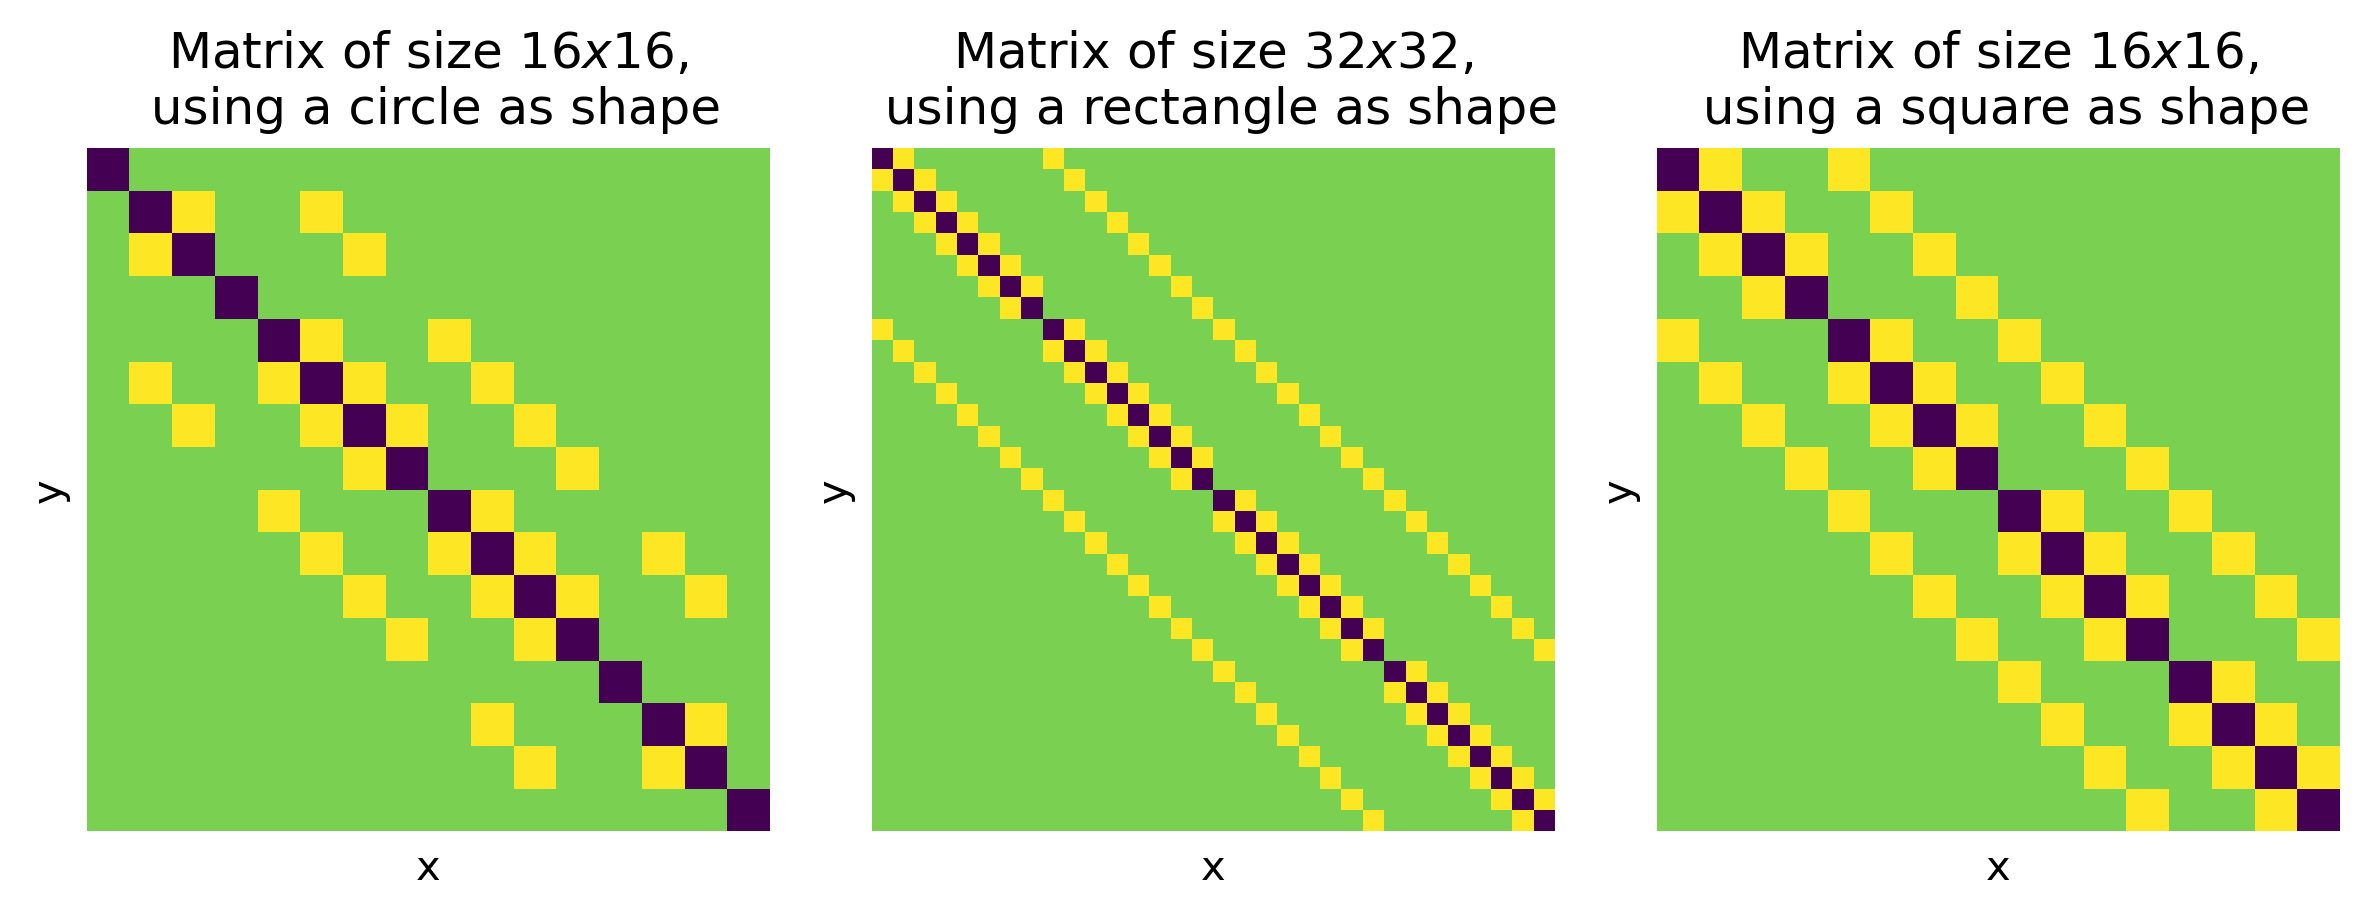

In [5]:
shapes = ["circle", "rectangle", "square"]
_, ax = plt.subplots(1, len(shapes), figsize=(FIG_SIZE), dpi=FIG_DPI)

for i, shape in enumerate(shapes):
    v = initialize_grid_vector(L, shape=shape)
    M = initialize_tridiagonal_matrix(v, L)

    create_seaborn_heatmap(M.toarray(), ax[i], False, True)
    ax[i].set_title(
        f"Matrix of size ${M.shape[0]}x{M.shape[1]}$,\n using a {shape} as shape"
    )
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")

plt.tight_layout()
plt.savefig(f"{FIG_DIR}matrix_shapes.png")
plt.show()
plt.close()

In [6]:
L = 50
v = initialize_grid_vector(L, shape=shape)

In [7]:
%%time
M = initialize_tridiagonal_matrix(vector=v, L=L, sparse=False)

frequencies, eigenvectors = solve_eigenvalues(M)

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 5.66 seconds with matrix of size 2500, N=50
CPU times: user 29.9 s, sys: 36.3 s, total: 1min 6s
Wall time: 5.71 s


In [8]:
%%time
M = initialize_tridiagonal_matrix(vector=v, L=L, sparse=True)

frequencies, eigenvectors = solve_eigenvalues(M)

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.07 seconds using sparse solver with matrix of size 2500, N=50
CPU times: user 305 ms, sys: 941 ms, total: 1.25 s
Wall time: 120 ms


In [9]:
def plot_shape_modus(shape: str, save: bool = False) -> None:
    """
    Plot the eigenmodes of a given shape.

    Params
    ----------
    - shape (str): The shape of the grid.
    - save (bool): If True, the plot will be saved.
    """
    L = 55
    v = initialize_grid_vector(L, shape=shape)
    M = initialize_tridiagonal_matrix(v, L, sparse=True)

    frequencies, eigenvectors = solve_eigenvalues(M, num_eigen=5)
    frequencies[:PLOTS_AMOUNT], eigenvectors[:, :PLOTS_AMOUNT]

    plot_multiple_eigenmodes(
        PLOTS_AMOUNT, frequencies, eigenvectors, L, shape=shape, save_img=save
    )

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.05 seconds using sparse solver with matrix of size 3025, N=55
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.04 seconds using sparse solver with matrix of size 3025, N=55


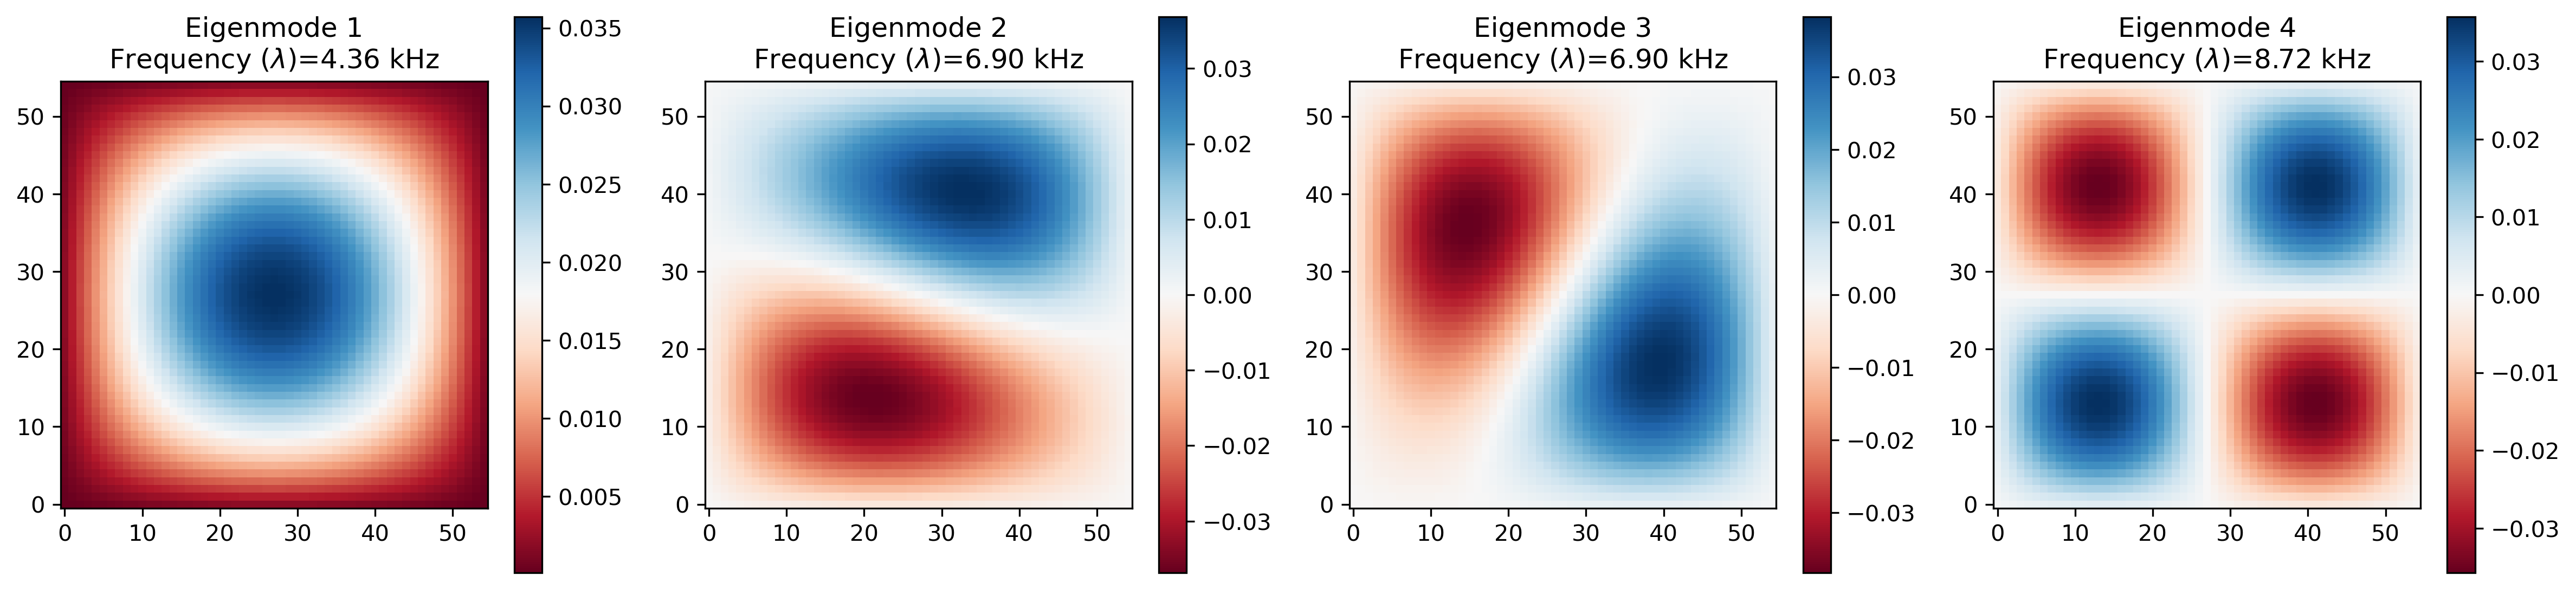

In [10]:
plot_shape_modus("square", save=True)
plot_shape_modus("square")

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.15 seconds using sparse solver with matrix of size 6050, N=77
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.12 seconds using sparse solver with matrix of size 6050, N=77


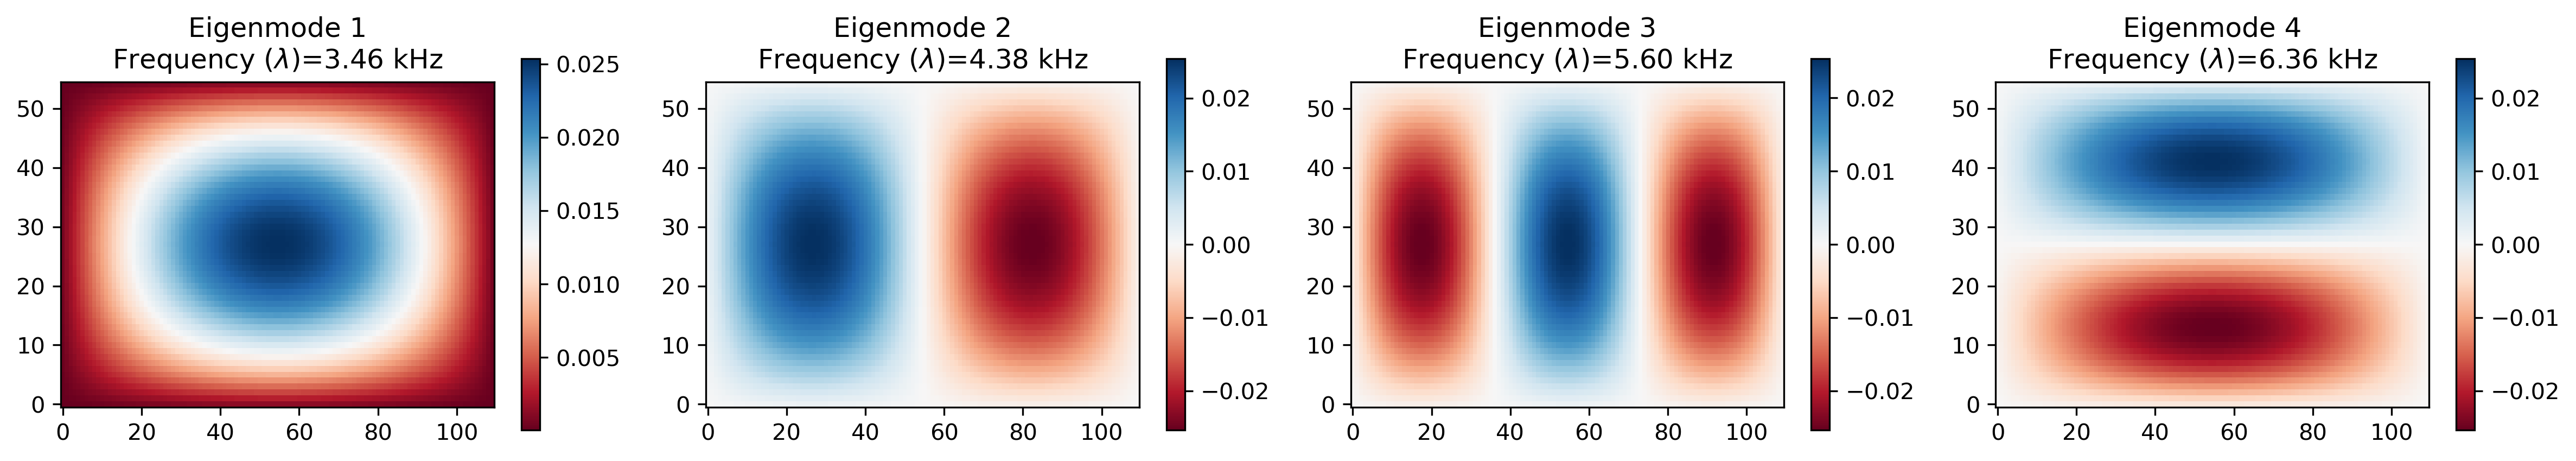

In [11]:
plot_shape_modus("rectangle", save=True)
plot_shape_modus("rectangle")

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.04 seconds using sparse solver with matrix of size 3025, N=55
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.08 seconds using sparse solver with matrix of size 3025, N=55


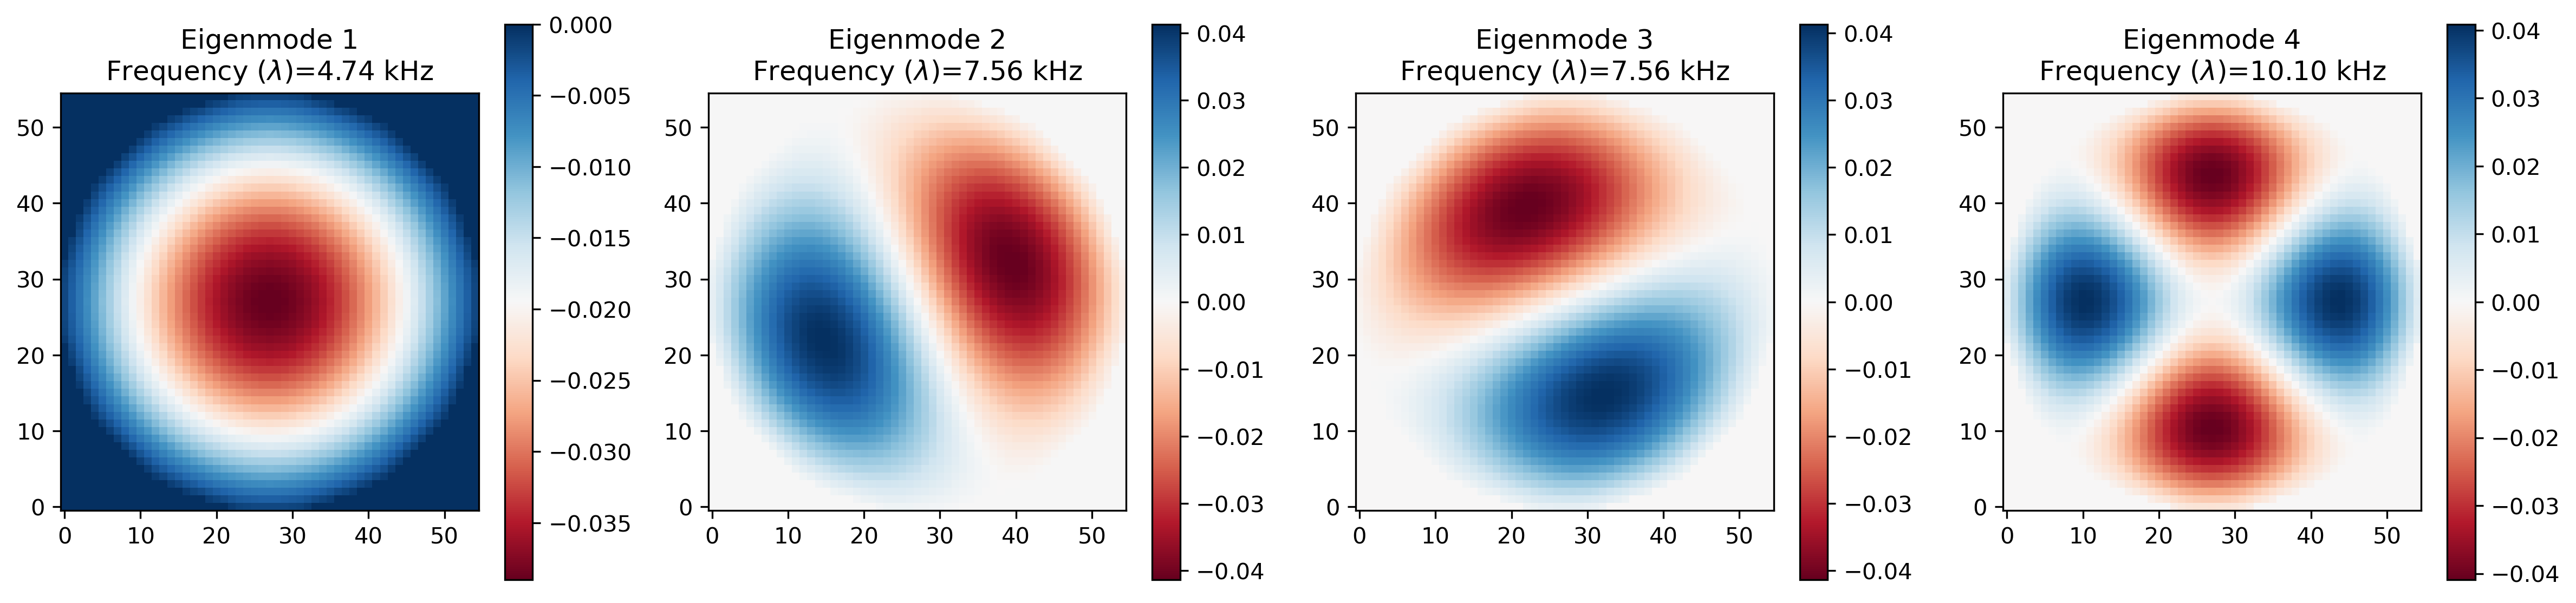

In [12]:
plot_shape_modus("circle", save=True)
plot_shape_modus("circle")

In [13]:
def plot_shape_frequency(shape: str) -> None:
    """
    Plot the frequency of a given shape.

    Paramss
    ----------
    - shape (str): The shape of the grid.
    """
    L_list = np.linspace(10, 100, 5).astype(int)
    frequencies_list = get_frequencies_list(L_list, shape=shape)

    mean_freq = np.mean(frequencies_list, axis=1)
    plot_eigenfrequency(L_list, mean_freq, shape, save_img=False)

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.00 seconds using sparse solver with matrix of size 100, N=10
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.01 seconds using sparse solver with matrix of size 1024, N=32
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.04 seconds using sparse solver with matrix of size 3025, N=55
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.07 seconds using sparse solver with matrix of size 5929, N=77
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.15 seconds using sparse solver with matrix of size 10000, N=100


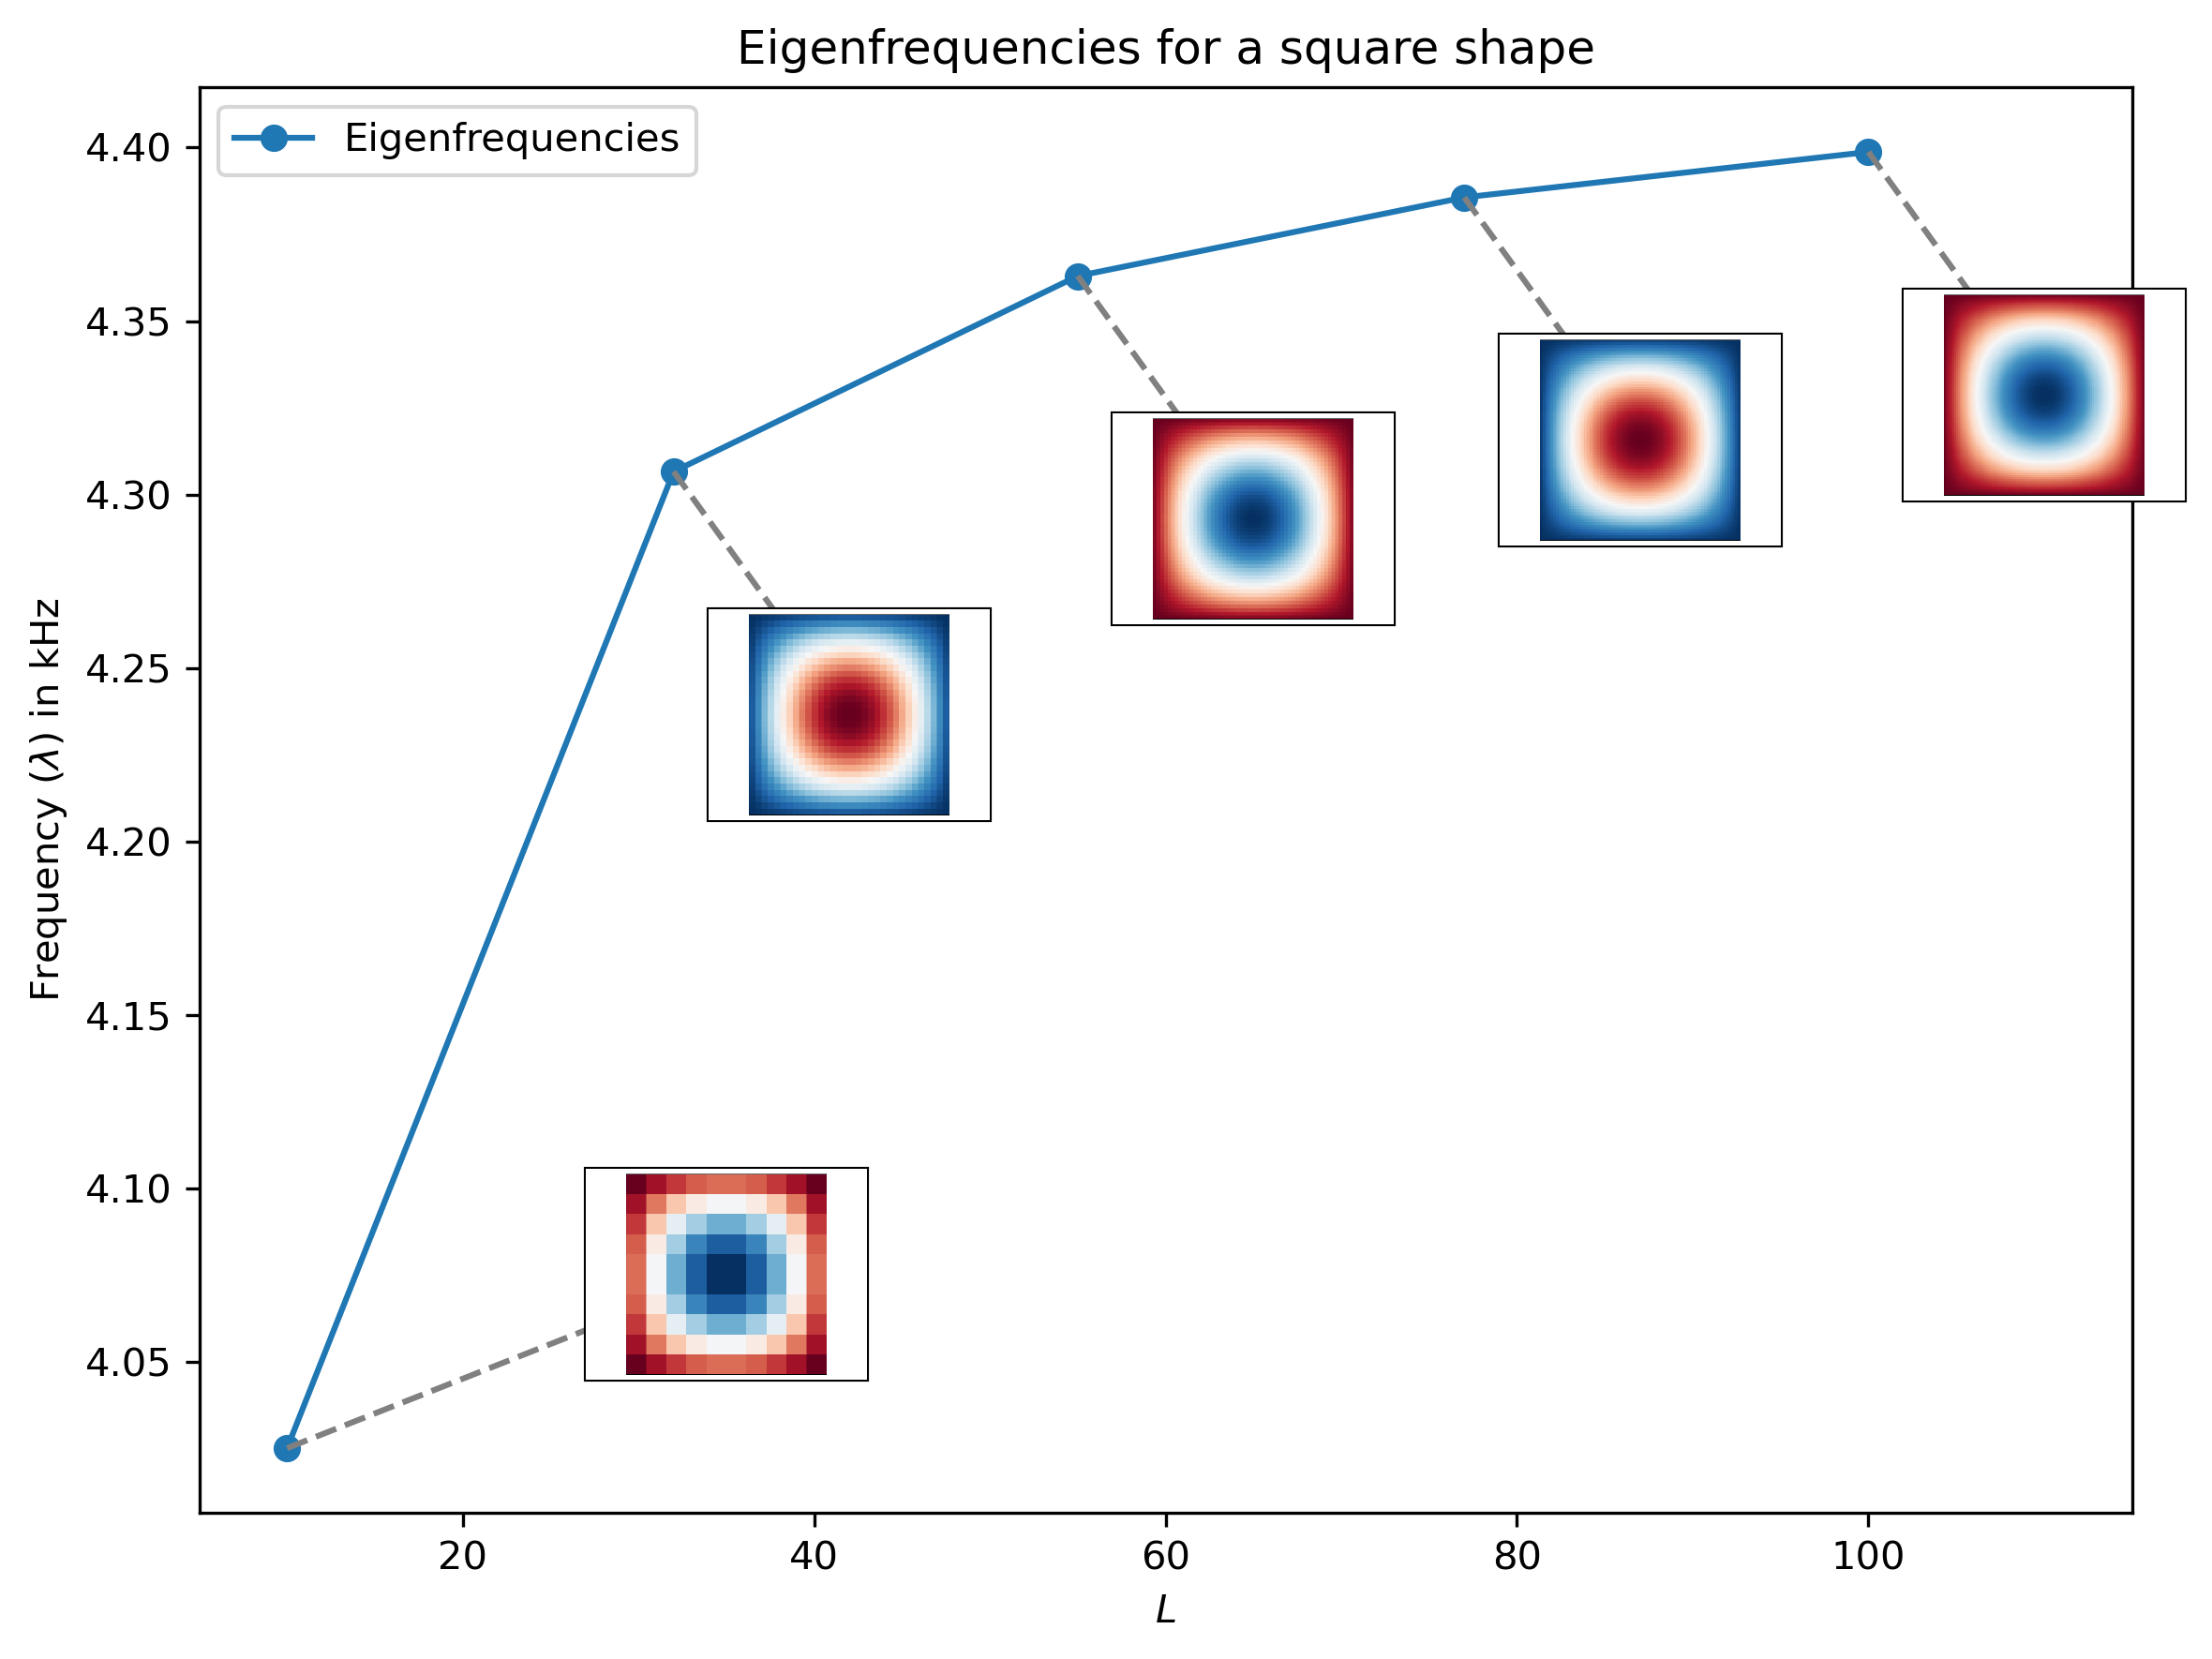

In [14]:
plot_shape_frequency("square")

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.00 seconds using sparse solver with matrix of size 200, N=14
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.03 seconds using sparse solver with matrix of size 2048, N=45
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.12 seconds using sparse solver with matrix of size 6050, N=77
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.38 seconds using sparse solver with matrix of size 11858, N=108
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 1.22 seconds using sparse solver with matrix of size 20000, N=141


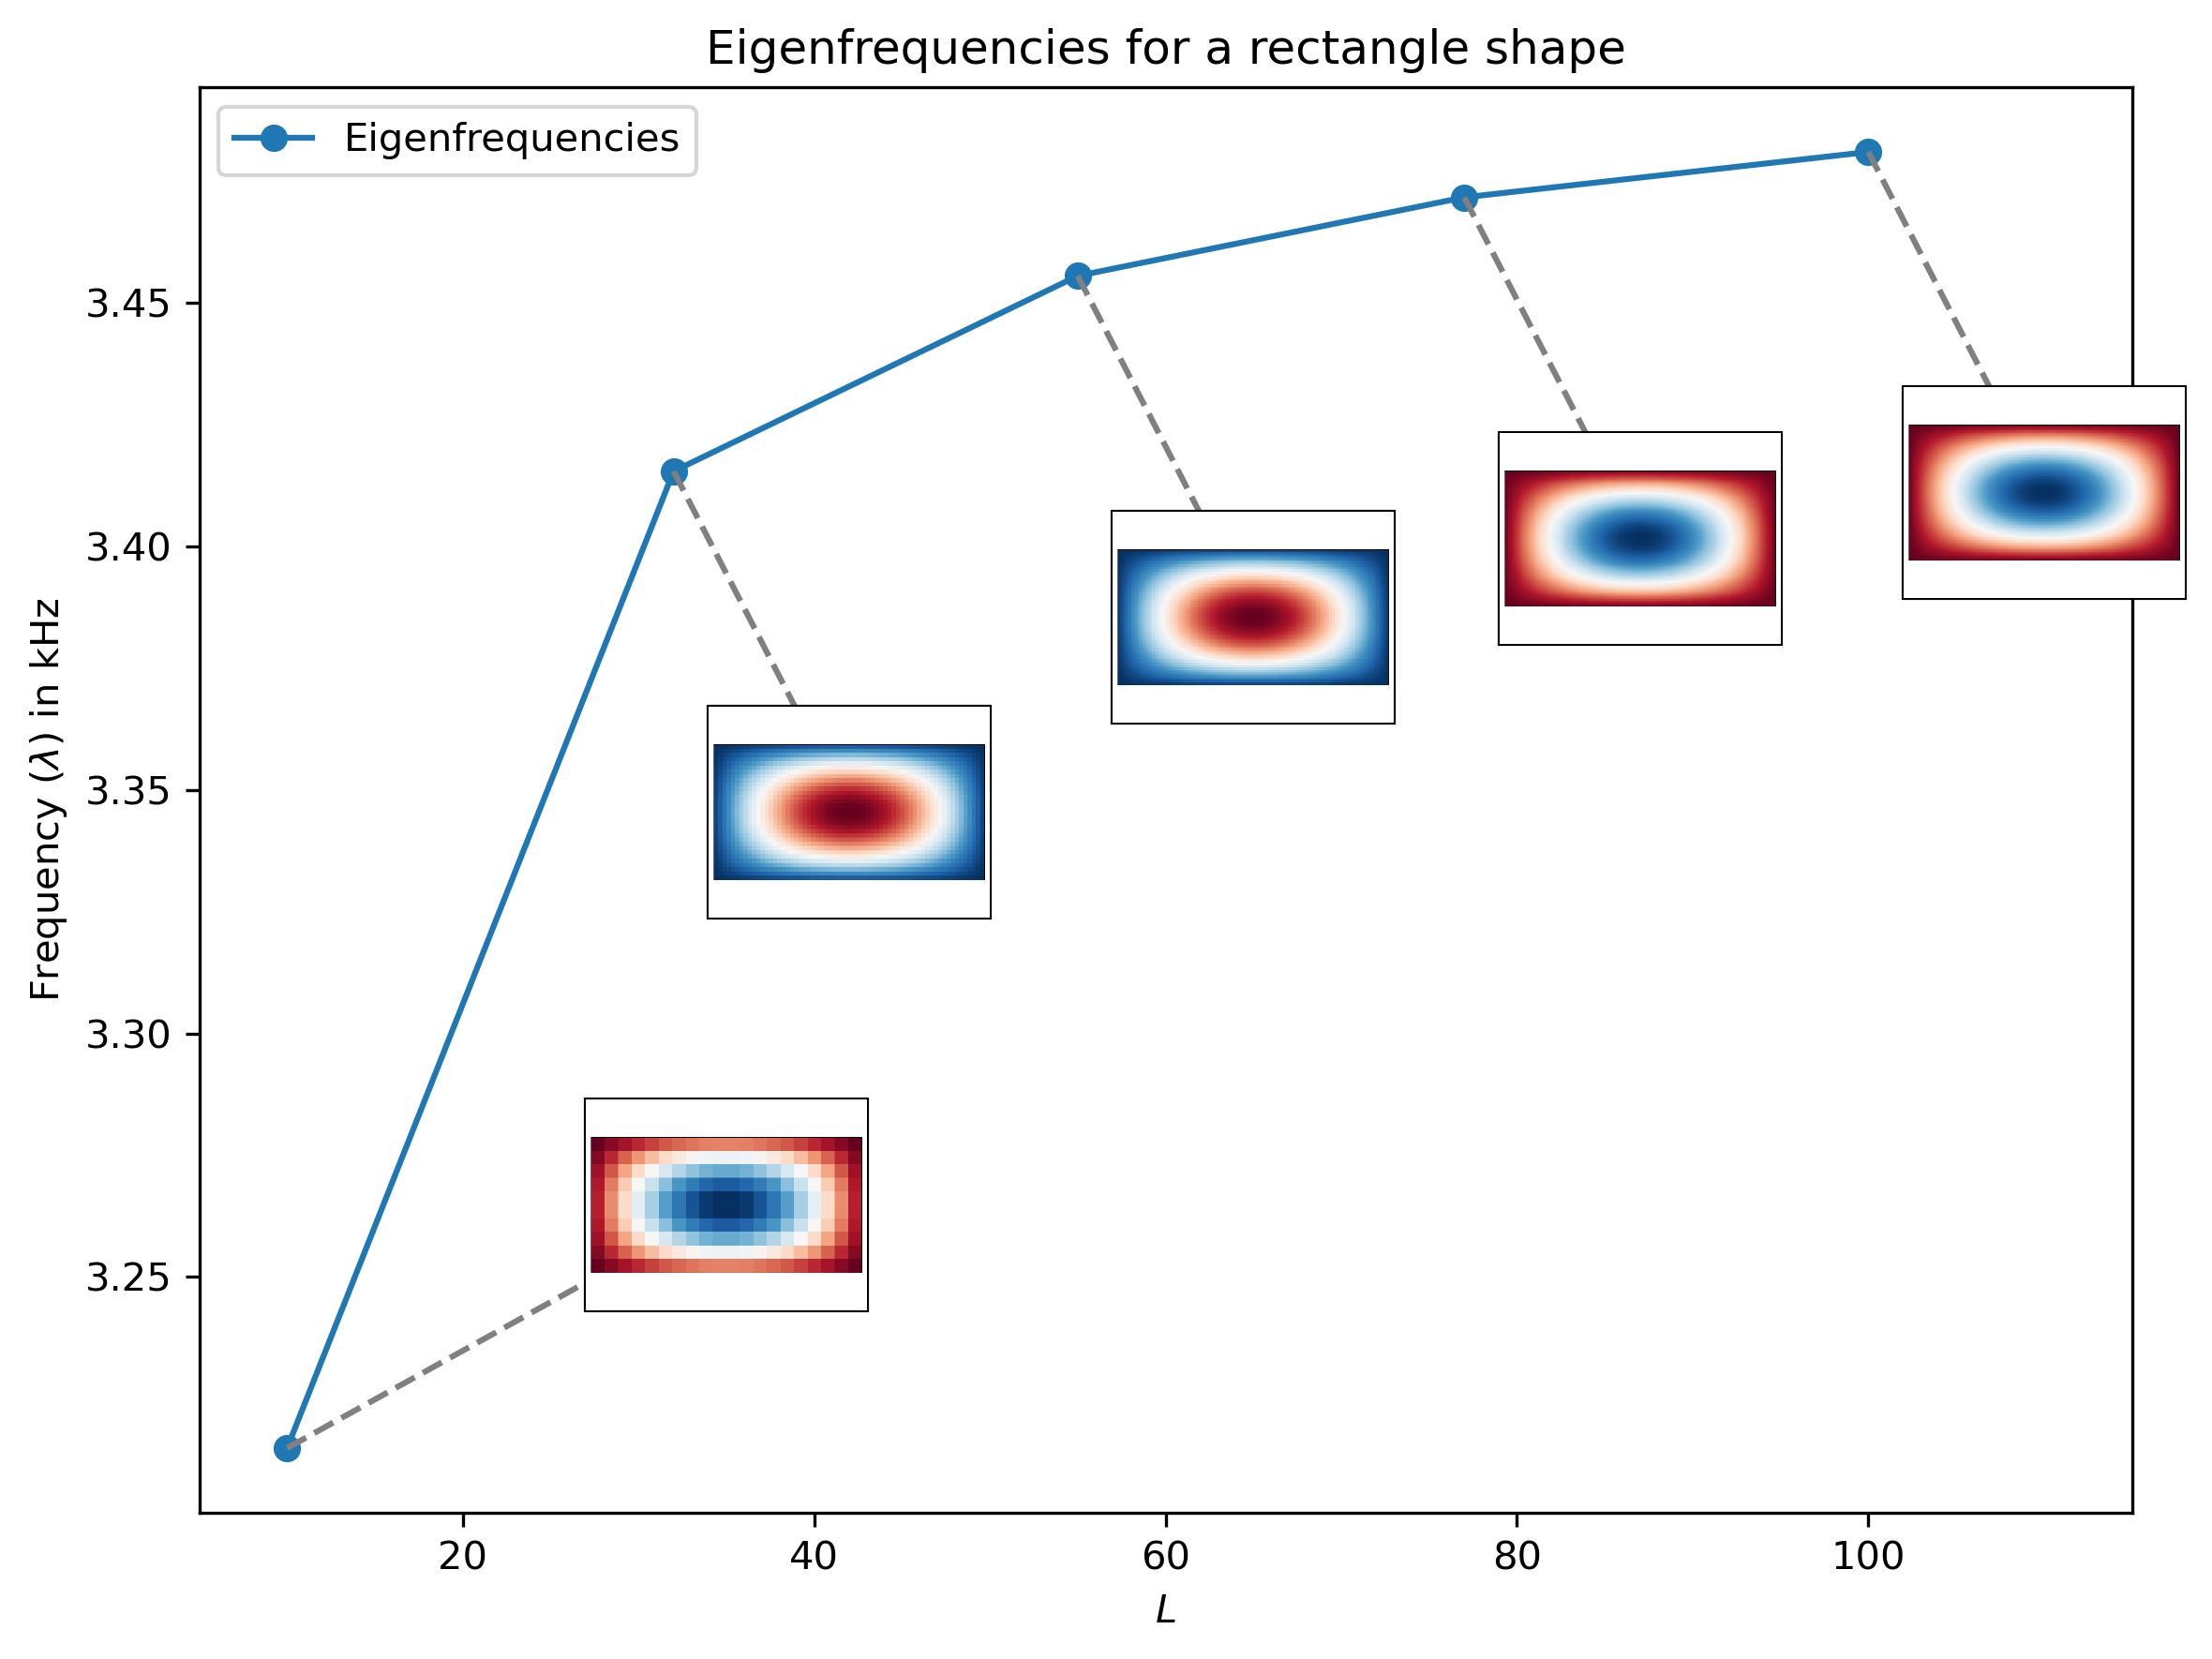

In [15]:
plot_shape_frequency("rectangle")

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.00 seconds using sparse solver with matrix of size 100, N=10
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.01 seconds using sparse solver with matrix of size 1024, N=32
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.03 seconds using sparse solver with matrix of size 3025, N=55
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.11 seconds using sparse solver with matrix of size 5929, N=77
Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.26 seconds using sparse solver with matrix of size 10000, N=100


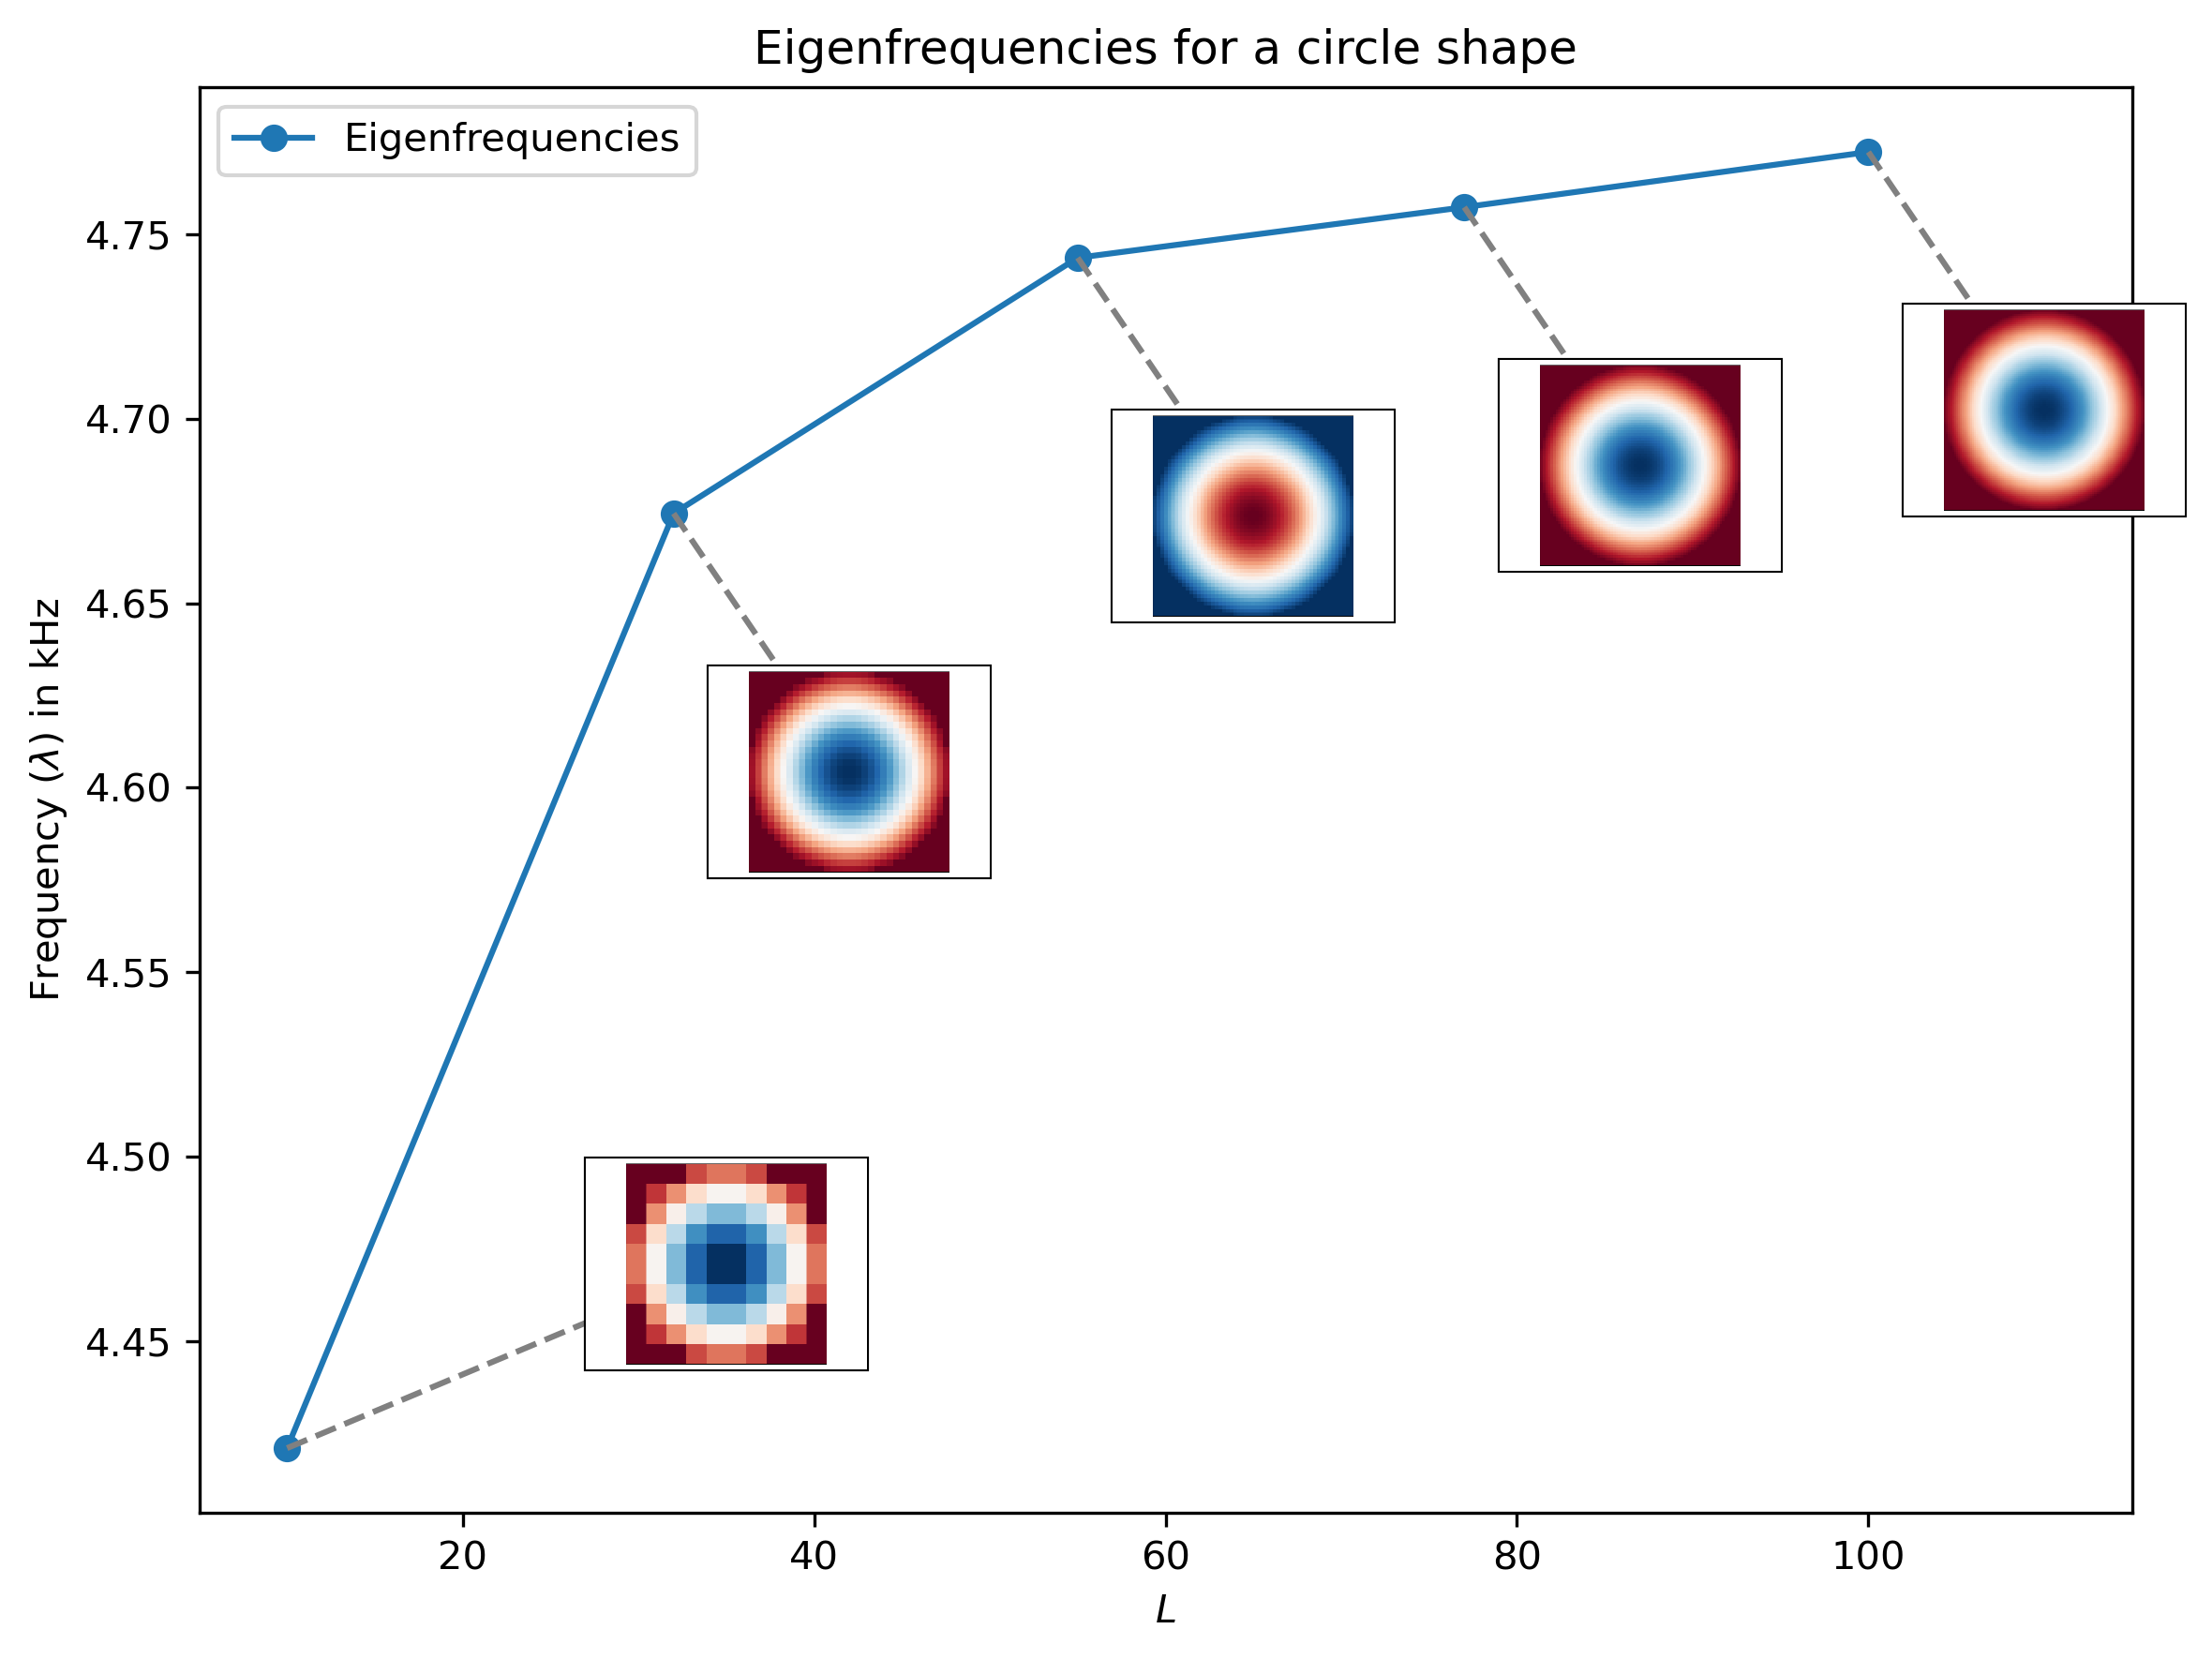

In [16]:
plot_shape_frequency("circle")

In [17]:
t_list = np.linspace(0, TIME_MAX, TIME_STEPS)
L = 50
v = initialize_grid_vector(L, shape="square")
M = initialize_tridiagonal_matrix(vector=v, L=L, sparse=True)

frequencies, eigenvectors = solve_eigenvalues(M)

eigenmodus = eigenvectors[:, SELECT_MODE].reshape(L, L).real
frequency = frequencies[SELECT_MODE]

plot_eigenmode_animation(1.0, eigenmodus, frequency, t_list, shape, delete_img=True)

Solving the eigenvalues using regular solver for matrix
Time taken to solve the eigenvalues: 0.17 seconds using sparse solver with matrix of size 2500, N=50


In [18]:
HTML(f'<img src="results/wave.gif">')

-----
# 3.2 Direct methods for solving the steady state problems
Lorem ipsum odor amet, consectetuer adipiscing elit. Varius nullam vulputate lobortis porttitor in odio mus dictum. Tellus phasellus congue hac, tempus montes ullamcorper himenaeos. Arcu bibendum convallis lacus taciti rutrum ac dictumst mollis. Cras nullam est nostra netus nascetur iaculis hendrerit. Odio parturient purus maecenas consectetur porta hendrerit lobortis sodales. Maecenas quisque gravida sed nisi odio pellentesque habitasse. Cras tempus lacinia rhoncus conubia duis massa. Sem nibh dui mus consequat facilisi. Porta malesuada porttitor neque turpis molestie?

Consequat dictum curabitur integer suspendisse inceptos. Habitant mattis odio lorem nostra feugiat vitae vel habitasse. Scelerisque vehicula turpis eleifend, felis aptent venenatis ante fames. Tincidunt auctor quam ipsum velit ornare augue. Etiam habitant felis diam; ullamcorper netus aenean consectetur leo. Purus phasellus potenti tortor maecenas pulvinar. Auctor cras cursus hac tempor nam leo ad.

_by: [Name]_

In [19]:
# LOCAL IMPORTS

In [20]:
# SOME CODE

In [21]:
# SOME CODE

-----
# 3.3 The leapfrog method - efficient time integration
Lorem ipsum odor amet, consectetuer adipiscing elit. Varius nullam vulputate lobortis porttitor in odio mus dictum. Tellus phasellus congue hac, tempus montes ullamcorper himenaeos. Arcu bibendum convallis lacus taciti rutrum ac dictumst mollis. Cras nullam est nostra netus nascetur iaculis hendrerit. Odio parturient purus maecenas consectetur porta hendrerit lobortis sodales. Maecenas quisque gravida sed nisi odio pellentesque habitasse. Cras tempus lacinia rhoncus conubia duis massa. Sem nibh dui mus consequat facilisi. Porta malesuada porttitor neque turpis molestie?

Consequat dictum curabitur integer suspendisse inceptos. Habitant mattis odio lorem nostra feugiat vitae vel habitasse. Scelerisque vehicula turpis eleifend, felis aptent venenatis ante fames. Tincidunt auctor quam ipsum velit ornare augue. Etiam habitant felis diam; ullamcorper netus aenean consectetur leo. Purus phasellus potenti tortor maecenas pulvinar. Auctor cras cursus hac tempor nam leo ad.

_by: [Name]_

In [22]:
# LOCAL IMPORT

In [23]:
# SOME CODE

In [24]:
# SOME CODE